<a href="https://colab.research.google.com/github/bkn872/GL_Hackathon/blob/main/Socio_Economic09_09_2022_2336.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MegaHacakthon - Voksedigital**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be "door to door" or "online based" to identify/

# **About:**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be
"door to door" or "online based" to identify/keep a check on the sections of society having lower levels of income.

Similarly in the US, it is a requirement for the federal bodies to be cognizant of people's income which falls under a 
threshold so that decisions taken on various fronts can be inclusive and without ambiguity. For this reason 
few federal bodies like the "Bureau Of Economic Analysis" outsource their masked data to 3rd party companies who are kept on contract to analyze the 
data to garner detailed insights and come up with different sets of best 
models to:

1) decide on a threshold value that can act as a good classification boundary condition.

2) to classify the people in the database based upon this threshold value.

For that reason, you are hired by one such company as an "Analyst" and are provided with the threshold value 
which is decided to be $50k/year.  
The task expected from you is to :

1) perform a detailed EDA to garner insights that can be helpful for the stakeholders.

2) to classify all the people who earn more or less than $50k/year based upon their various demographical features

   by building a generalizable classification model.

Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',	' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly

In [2]:
#datafranme related libraries
import pandas as pd
import numpy as np
#visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.width', 500)


In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
test_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/test.csv')
test_data.shape

(42000, 33)

In [5]:
train_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/train.csv')
train_data.shape

(105000, 34)

In [6]:
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
year_of_poll,2004,2005,2004,2004,2004,2004,2005,2004,2005,2005
own_self_emp,0,0,0,0,0,0,0,0,0,0
veteran benefits,2,0,2,2,2,0,2,2,2,2
currently_enrolled,High school,College/University,NaN,College/University,NaN,NaN,College/University,High school,College/University,High school
race,White,White,White,Amer/Indian/Aleut/Eskimo,White,White,White,White,White,White
father_country,United-States,Japan,United-States,United-States,United-States,Mexico,United-States,United-States,United-States,Puerto-Rico
educ,Associates degree-academic program,Children,Some college but no degree,High school graduate,High school graduate,Children,Some college but no degree,High school graduate,10th grade,Some college but no degree
house_stat,Householder,Child <18 never marr not in subfamily,Secondary individual,Householder,Householder,Child <18 never marr not in subfamily,Child 18+ never marr Not in a subfamily,Spouse of householder,Householder,Spouse of householder
major_ind_code,Business and repair services,Not in universe or children,Manufacturing-durable goods,Wholesale trade,Wholesale trade,Not in universe or children,Entertainment,Construction,Business and repair services,Not in universe or children


In [7]:
train_data['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

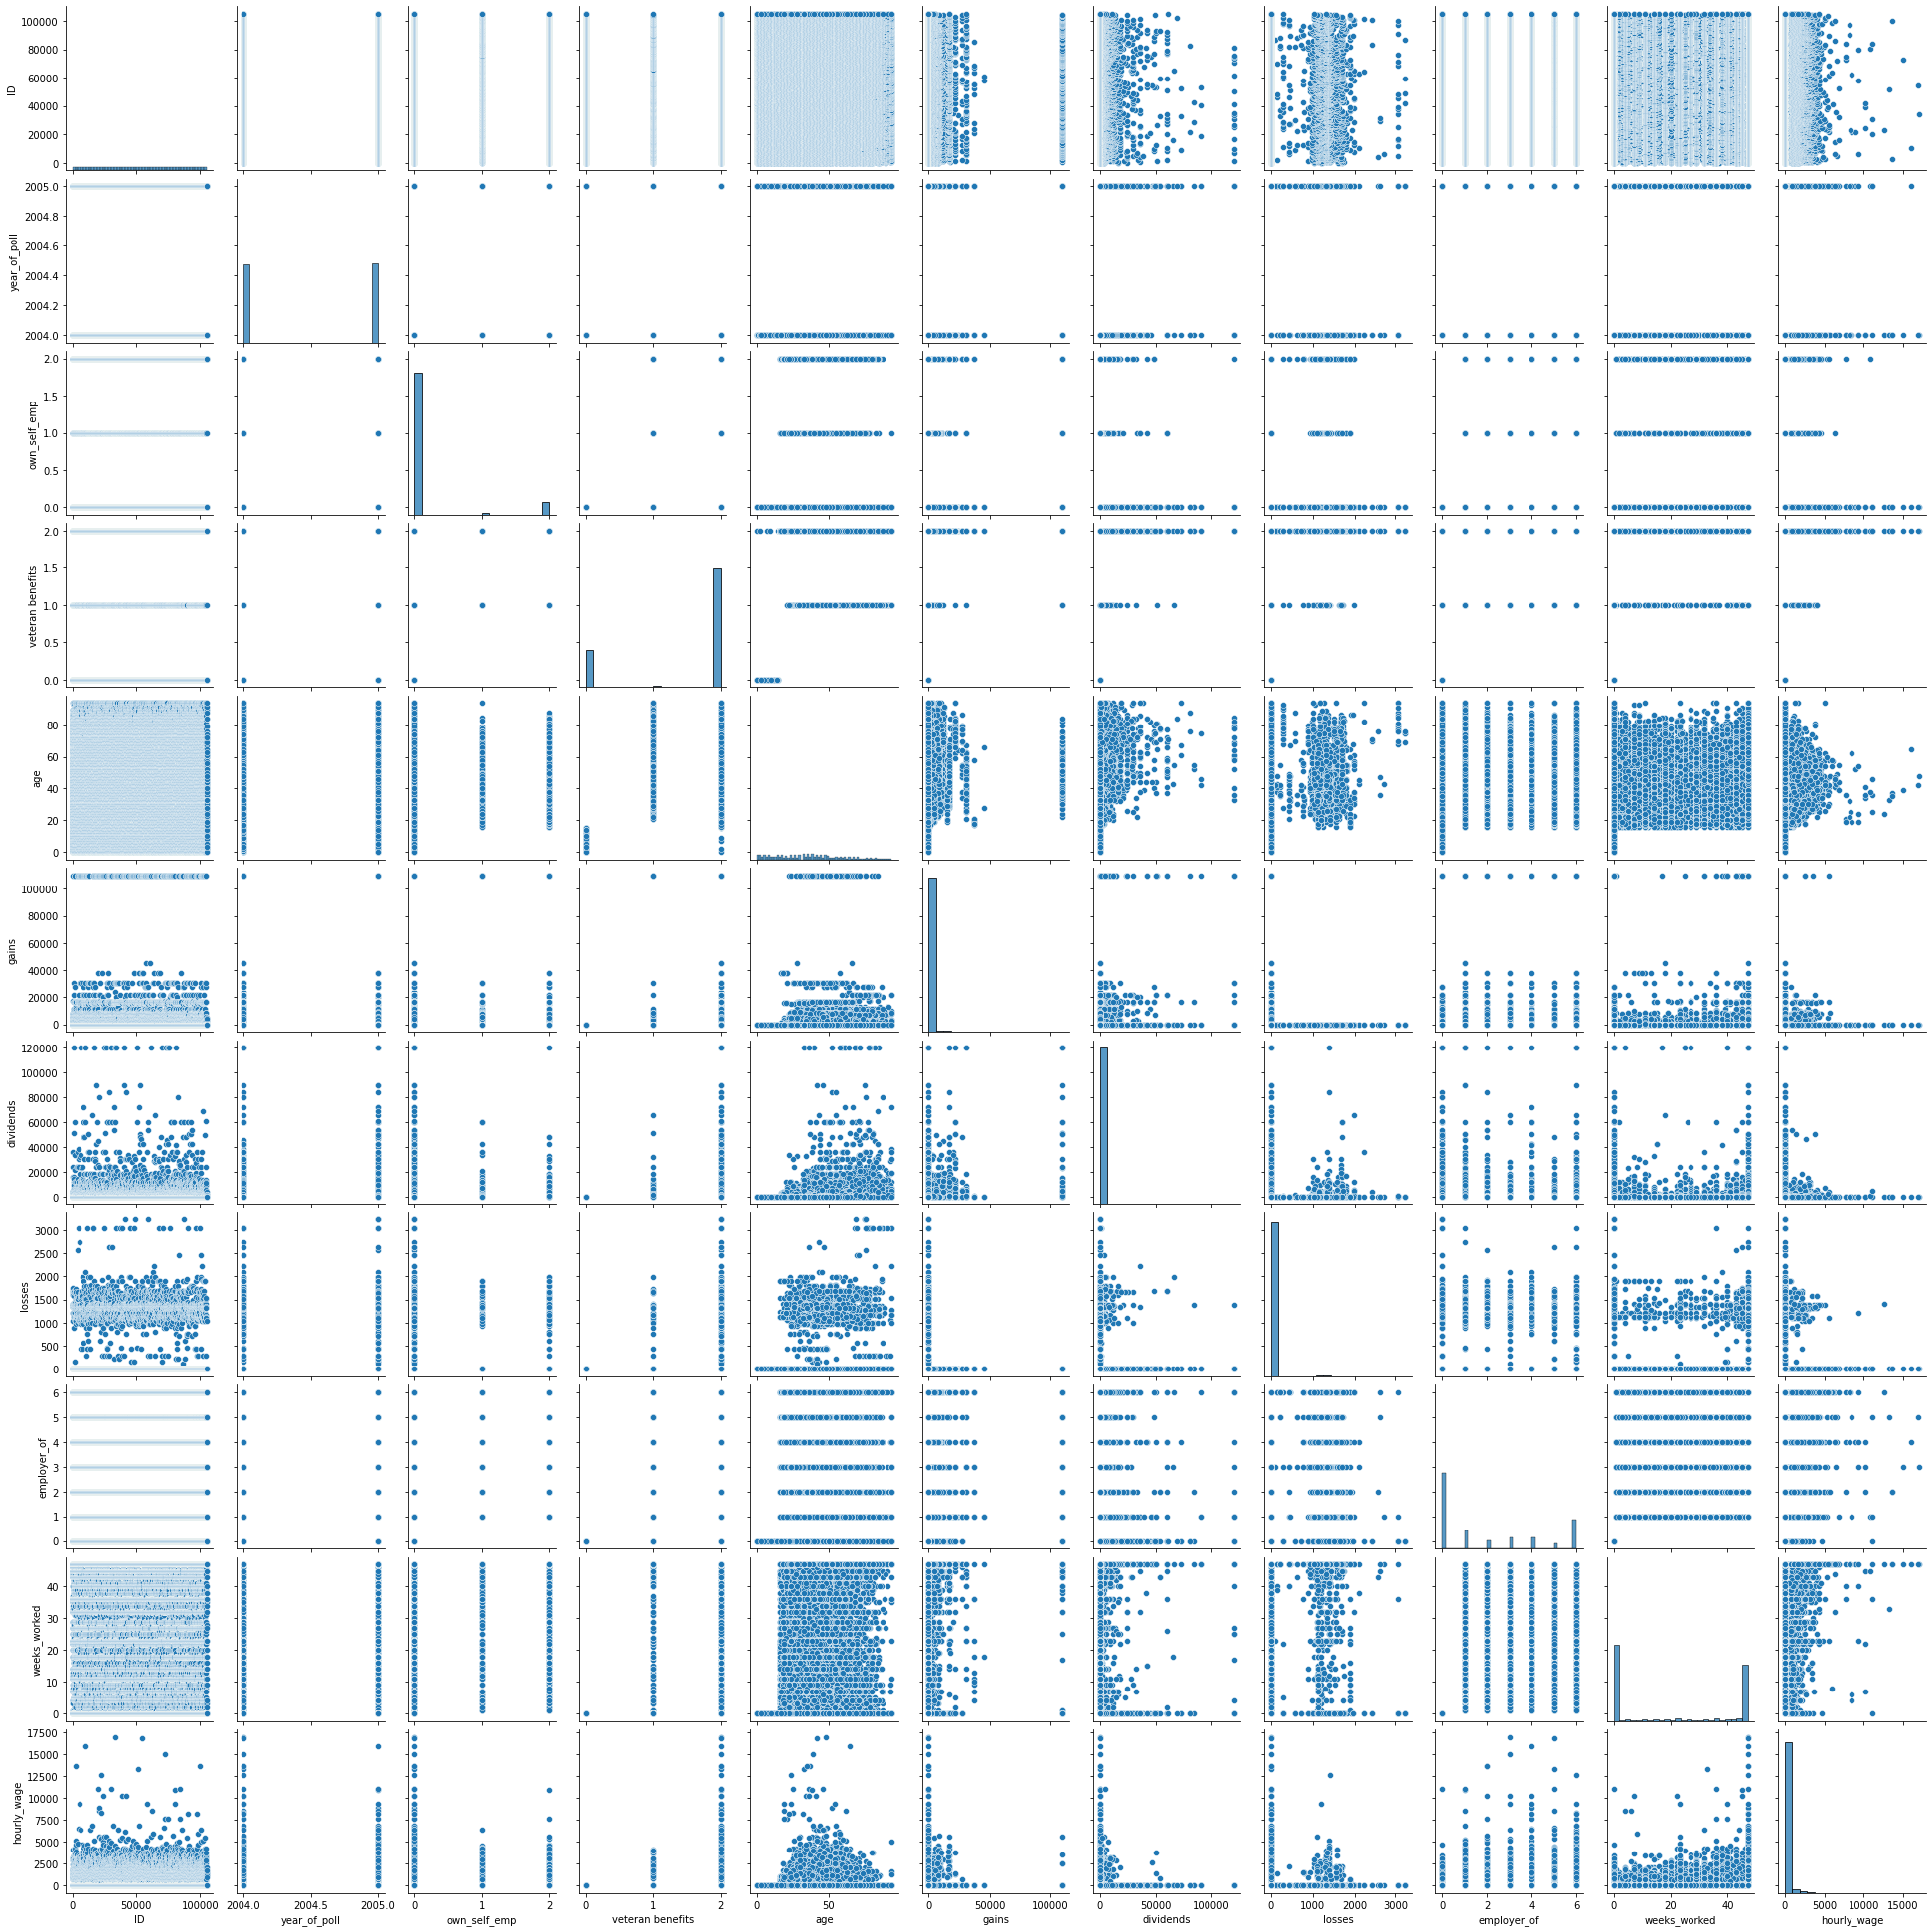

In [8]:
sns.pairplot(train_data)

In [10]:
pd.crosstab(train_data['age'],train_data['gender'])

gender,F,M
age,,
0,730,772
1,807,837
2,832,896
3,857,869
4,866,902
...,...,...
90,122,55
91,119,45
92,83,47


In [19]:
train_data['income']=train_data['income'].replace({'Less than 50K $':0,'More than 50K $':1})
train_data

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income,Class
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,2005,2,2,NaN,White,United-States,High school graduate,Householder,Not in universe or children,...,47,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1,0
104996,104996,2004,0,0,College/University,White,United-States,Children,Child <18 never marr not in subfamily,Not in universe or children,...,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1,0
104997,104997,2004,0,2,NaN,White,United-States,High school graduate,Nonfamily householder,Manufacturing-nondurable goods,...,47,NaN,1693.2,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1,0
104998,104998,2005,0,2,NaN,White,Italy,High school graduate,Nonfamily householder,Not in universe or children,...,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1,0


In [20]:
df=train_data

In [21]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
   dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
   return dataframe

def degisken_tiplerine_ayirma(data,cat_th,car_th):
   """
   Veri:data parametresi ili fonksiyona girilen verinin değişkenlerin sınıflandırılması.
   Parameters
   ----------
   data: pandas.DataFrame
   İşlem yapılacak veri seti
   cat_th:int
   categoric değişken threshold değeri
   car_th:int
   Cardinal değişkenler için threshold değeri
   Returns
   -------
    cat_deg:list
    categorik değişken listesi
    num_deg:list
    numeric değişken listesi
    car_deg:list
    categoric ama cardinal değişken listesi
   Examples
   -------
    df = dataset_yukle("breast_cancer")
    cat,num,car=degisken_tiplerine_ayirma(df,10,20)
   Notes
   -------
    cat_deg + num_deg + car_deg = toplam değişken sayısı
   """


   num_but_cat=[i for i in data.columns if data[i].dtypes !="O" and data[i].nunique() < cat_th]

   car_deg=[i for i in data.columns if data[i].dtypes == "O" and data[i].nunique() > car_th]

   num_deg=[i for i in data.columns if data[i].dtypes !="O" and i not in num_but_cat]

   cat_deg = [i for i in data.columns if data[i].dtypes == "O" and i not in car_deg]

   cat_deg = cat_deg+num_but_cat

   print(f"Dataset kolon/değişken sayısı: {data.shape[1]}")
   print(f"Dataset satır/veri sayısı: {data.shape[0]}")
   print("********************************************")
   print(f"Datasetin numeric değişken sayısı: {len(num_deg)}")
   print(f"Datasetin numeric değişkenler: {num_deg}")
   print("********************************************")
   print(f"Datasetin categoric değişken sayısı: {len(cat_deg)}")
   print(f"Datasetin categoric değişkenler: {cat_deg}")
   print("********************************************")
   print(f"Datasetin cardinal değişken sayısı: {len(car_deg)}")
   print(f"Datasetin cardinal değişkenler: {car_deg}")
   print("********************************************")

   return cat_deg,num_deg,car_deg

def calculate_estimated_salary(df,key):
    sorted_df=df[(df[key[0]]==1 )&(df[key[1]]==1 )&(df[key[2]]==1 )]
    return sorted_df["Avg Salary(K)"].mean()

def pred_model(model, **datasets):
   pred_val = model.predict(datasets['X_test'])
   pred_val = pd.DataFrame(pred_val, index=datasets['X_test'].index, columns=['pred'])

   pred_test = model.predict(datasets['X_test'])

   return pred_test, pred_val


def objective_lgb(trial):
   learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.25, log=True)
   reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-9, 100.0)
   reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-9, 100.0)
   subsample = trial.suggest_float("subsample", 0.0001, 1.0)
   colsample_bytree = trial.suggest_float("colsample_bytree", 0.0001, 1.0)
   max_depth = trial.suggest_int("max_depth", 1, 50)
   early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 100, 700)
   n_estimators = trial.suggest_int("n_estimators", 0, 10000)

   model = LGBMRegressor(
      random_state=50,
      tree_method="gpu_hist",
      gpu_id=0,
      predictor="gpu_predictor",
      n_estimators=n_estimators,
      learning_rate=learning_rate,
      reg_lambda=reg_lambda,
      reg_alpha=reg_alpha,
      subsample=subsample,
      colsample_bytree=colsample_bytree,
      max_depth=max_depth,
   )
   model.fit(
      datasets['X_train'],
      datasets['y_train'],
      early_stopping_rounds=early_stopping_rounds,
      eval_set=[(datasets['X_test'], datasets['y_test'])],
      verbose=1200,
   )
   preds_valid = model.predict(datasets['X_test'])
   rmse = mean_squared_error(datasets['y_test'], preds_valid, squared=False)

   return rmse
def eda(df,column):
    plt.figure(figsize=(30,15))
    sns.barplot(x="country",y="Economy: Services and other activity (% of GVA)",data=df)
    plt.xlabel("Countries")
    plt.ylabel(column)
    plt.title(column+" For Each Countries",fontsize=20)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
cat_deg,num_deg,car_deg=degisken_tiplerine_ayirma(df, 10, 20)

Dataset kolon/değişken sayısı: 35
Dataset satır/veri sayısı: 105000
********************************************
Datasetin numeric değişken sayısı: 7
Datasetin numeric değişkenler: ['ID', 'age', 'gains', 'dividends', 'losses', 'weeks_worked', 'hourly_wage']
********************************************
Datasetin categoric değişken sayısı: 23
Datasetin categoric değişkenler: ['currently_enrolled', 'race', 'educ', 'labour_union', 'major_occ_code', 'house_summary', 'gender', 'hisp_origin', 'marriage_status', 'house_1yr_ago', 'income_filled', 'under18', 'unemp_reason', 'citizenship', 'woker_type', 'fed_liability', 'full_partime_job', 'year_of_poll', 'own_self_emp', 'veteran benefits', 'employer_of', 'income', 'Class']
********************************************
Datasetin cardinal değişken sayısı: 5
Datasetin cardinal değişkenler: ['father_country', 'house_stat', 'major_ind_code', 'self_country', 'mother_country']
********************************************


In [23]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df[num_deg])
kumeler = kmeans.labels_
df["Class"]=kumeler
df = pd.DataFrame(df)
df.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income,Class
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [25]:
df['Class'].value_counts()

1    35165
0    34999
2    34836
Name: Class, dtype: int64

In [26]:
print("3. Sınıfa ait Ülkeler: ",df[df["Class"]==2]["self_country"].unique())
print("********************************************")
print("2. Sınıfa ait Ülkeler: ",df[df["Class"]==1]["self_country"].unique())
print("********************************************")
print("1. Sınıfa ait Ülkeler: ",df[df["Class"]==0]["self_country"].unique())

3. Sınıfa ait Ülkeler:  [' United-States' ' Philippines' ' Puerto-Rico' ' Mexico' ' ?' ' Germany'
 ' Guatemala' ' El-Salvador' ' England' ' Ireland' ' Columbia' ' Portugal'
 ' Honduras' ' South Korea' ' Poland' ' China' ' Greece' ' Laos'
 ' Ecuador' ' Panama' ' Canada' ' Vietnam' ' Jamaica' ' Nicaragua' ' Cuba'
 ' Outlying-U S (Guam USVI etc)' ' Haiti' ' Dominican-Republic' ' Japan'
 ' Italy' ' Taiwan' ' India' ' Cambodia' ' Peru' ' Iran' ' France'
 ' Hong Kong' ' Trinadad&Tobago' ' Hungary' ' Thailand' ' Yugoslavia'
 ' Holand-Netherlands' ' Scotland']
********************************************
2. Sınıfa ait Ülkeler:  [' United-States' ' Germany' ' Puerto-Rico' ' Philippines' ' Mexico' ' ?'
 ' Guatemala' ' Cuba' ' Italy' ' Vietnam' ' China' ' Canada'
 ' El-Salvador' ' Ireland' ' Dominican-Republic' ' South Korea'
 ' Portugal' ' Peru' ' Thailand' ' Taiwan' ' Japan' ' Haiti' ' Columbia'
 ' India' ' Cambodia' ' France' ' Poland' ' England'
 ' Outlying-U S (Guam USVI etc)' ' Scotland' ' 

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[num_deg])
df_pca=pd.DataFrame(data=df_pca,columns=["Feature_1","Feature_2"])
df_pca["self_country"]=df["self_country"]

In [32]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df_pca[["Feature_1","Feature_2"]])

kumeler = kmeans.labels_
df_pca["Class"]=kumeler
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,Feature_1,Feature_2,self_country,Class
0,52499.589341,-495.725382,United-States,0
1,52498.589178,-495.749907,United-States,0
2,52497.589343,-495.724831,United-States,0
3,52496.589337,-495.727845,United-States,0
4,52495.589352,-495.721498,United-States,0


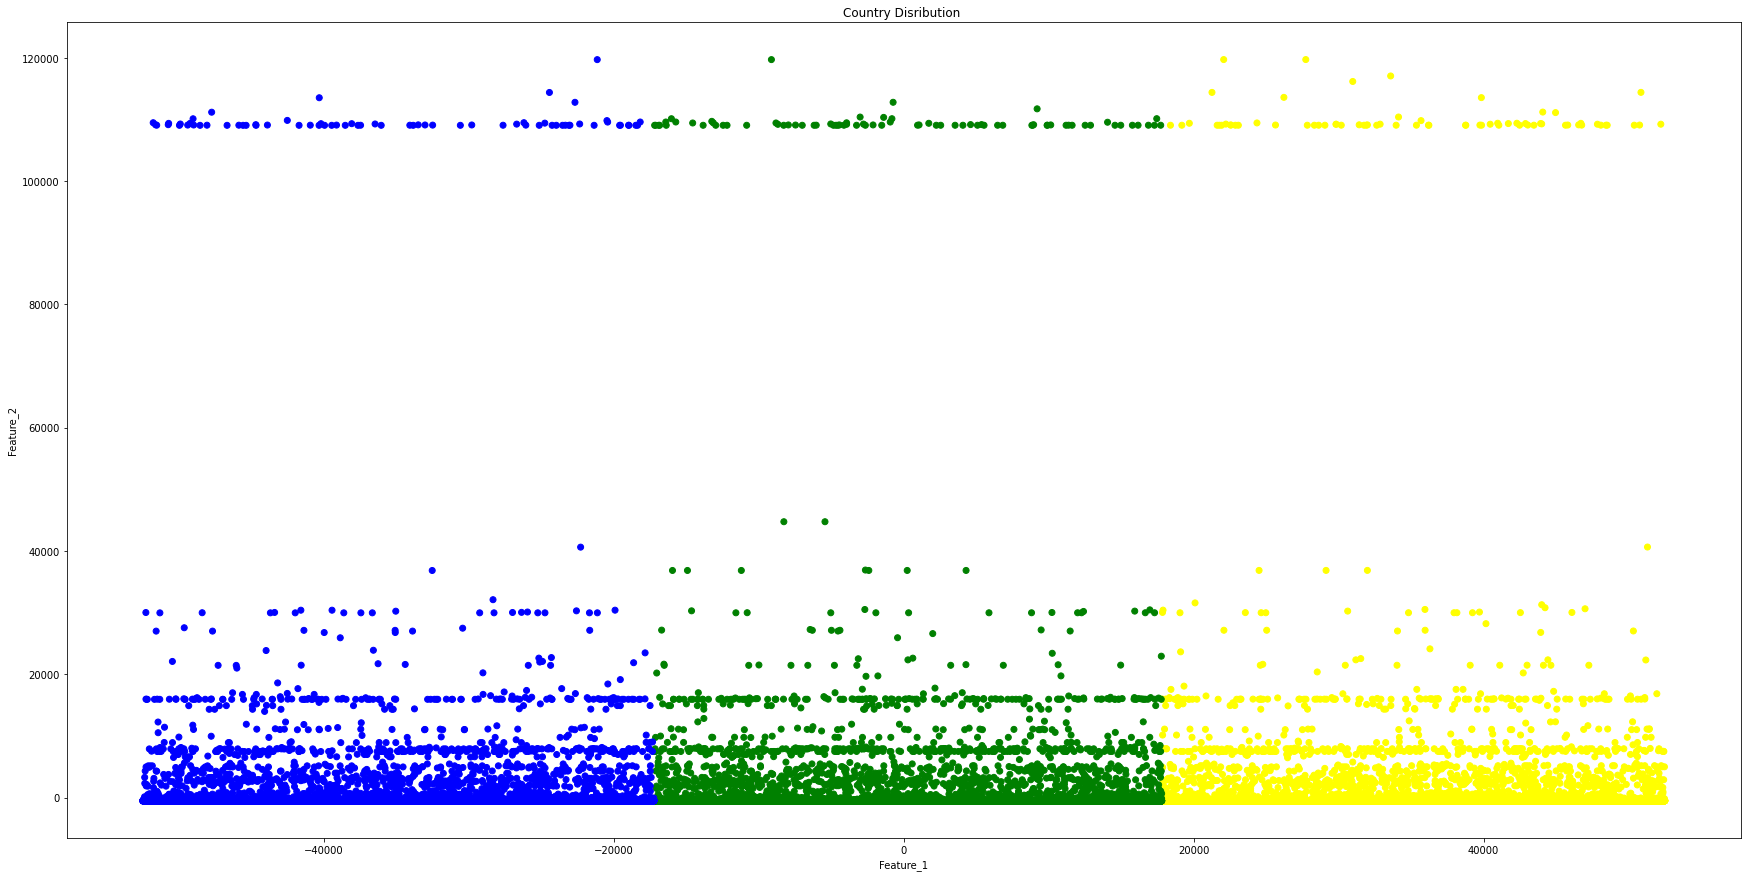

In [33]:
colors = {0:'yellow', 1:'blue', 2:'green'}
plt.figure(figsize=(30,15))
plt.scatter(df_pca["Feature_1"],df_pca["Feature_2"],c=df_pca['Class'].map(colors))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Country Disribution ")
plt.show()

In [27]:
df[num_deg]=df[num_deg].fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['age'].value_counts()

37    1839
36    1814
33    1784
4     1768
38    1766
39    1748
35    1734
2     1728
3     1726
40    1714
5     1714
32    1707
12    1700
7     1693
34    1688
6     1685
41    1680
14    1669
42    1660
30    1651
1     1644
43    1642
8     1637
10    1627
9     1597
16    1587
15    1580
29    1568
44    1564
13    1561
24    1533
45    1517
0     1502
47    1484
17    1483
18    1460
46    1444
26    1444
27    1443
48    1436
28    1432
49    1414
25    1413
23    1352
19    1312
50    1297
21    1280
22    1279
20    1262
54    1170
51    1147
52    1131
55    1098
56    1035
58     927
57     919
59     907
67     869
60     835
61     826
62     822
70     821
68     806
63     801
65     800
66     789
64     785
72     783
69     777
71     759
75     754
74     751
77     718
76     696
78     623
79     541
80     539
81     496
82     486
83     417
84     415
85     385
94     365
86     337
87     323
88     291
89     221
90     177
91     164
92     130
93     102

In [ ]:
test_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,105000,105001,105002,105003,105004,105005,105006,105007,105008,105009
year_of_poll,2005,2004,2004,2004,2004,2005,2004,2005,2004,2005
own_self_emp,0,0,0,2,0,2,0,0,0,0
veteran benefits,2,2,2,2,2,2,2,0,2,0
currently_enrolled,College/University,College/University,NaN,NaN,NaN,College/University,High school,College/University,College/University,NaN
race,White,White,White,White,White,White,White,White,Black,Black
father_country,United-States,United-States,United-States,United-States,Iran,United-States,United-States,United-States,United-States,United-States
educ,Some college but no degree,Bachelors degree(BA AB BS),7th and 8th grade,High school graduate,Doctorate degree(PhD EdD),High school graduate,Doctorate degree(PhD EdD),Children,10th grade,Children
house_stat,Householder,Nonfamily householder,In group quarters,Secondary individual,Householder,Spouse of householder,Nonfamily householder,Child <18 never marr not in subfamily,Householder,Child <18 never marr not in subfamily
major_ind_code,Manufacturing-nondurable goods,Medical except hospital,Not in universe or children,Manufacturing-nondurable goods,Public administration,Not in universe or children,Other professional services,Not in universe or children,Retail trade,Not in universe or children


In [ ]:
train_data.describe(include='object').T  

,count,unique,top,freq
currently_enrolled,73557,2,College/University,42386
race,105000,5,White,88078
father_country,105000,43,United-States,83720
educ,105000,17,High school graduate,25608
house_stat,104989,31,Householder,28081
major_ind_code,105000,24,Not in universe or children,53055
labour_union,69669,2,no,59270
self_country,105000,43,United-States,93022
major_occ_code,51945,14,Adm support including clerical,7708
mother_country,105000,43,United-States,84324


In [ ]:
train_data['mother_country'].value_counts()

 United-States                   84324
 Mexico                           5199
 ?                                3243
 Puerto-Rico                      1369
 Italy                             990
 Germany                           742
 Canada                            736
 Philippines                       651
 Cuba                              592
 El-Salvador                       581
 Dominican-Republic                579
 Poland                            578
 England                           463
 China                             390
 Columbia                          337
 South Korea                       332
 Ireland                           298
 India                             271
 Vietnam                           253
 Japan                             248
 Jamaica                           240
 Guatemala                         235
 Ecuador                           202
 Haiti                             192
 Peru                              187
 Nicaragua               

In [ ]:
train_data['race'].value_counts()

 White                      88078
 Black                      10763
Asian/Pacific_Islander       3050
 Other                       1935
Amer/Indian/Aleut/Eskimo     1174
Name: race, dtype: int64

In [ ]:
train_data[train_data.isnull().any(axis=1)]

In [ ]:
train_data['income']=train_data['income'].replace({'Less than 50K $':0,'More than 50K $':1})
train_data


In [ ]:
train_data['income'].value_counts()

In [ ]:
train_set=pd.get_dummies(train_data, prefix=None , prefix_sep="_", dummy_na=False, columns=None)
train_set.info()

In [ ]:
temp=train_set.describe(include='all').T
temp

In [ ]:
#temp.to_excel('/content/drive/My Drive/Python/Socio_Economics/categorical_elimination1.xlsx')

In [ ]:
#sns.pairplot(data=train_data)

In [ ]:
data=train_data.select_dtypes(include=['int64','floating'])
data.shape

# selecting only numerical Data 

In [ ]:
data.head()

#Model building 

In [ ]:
from sklearn.model_selection import train_test_split

# importing test And trainset

In [ ]:
X1=data.drop(['income',],axis=1)
y1=data[['income']]


In [ ]:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1,test_size=0.30, random_state=1)

In [ ]:
regression1_model=LinearRegression()
regression1_model.fit(X1_train, y1_train)

In [ ]:
intercept=regression1_model.intercept_[0]
print("The intercept for out model is {}".format(intercept))

In [ ]:
regression1_model.score(X1_test, y1_test)

#Model wit data off converting categorical data into Dummy columns 

In [ ]:
X=train_set.drop(['income','income_filled_ No','income_filled_ Yes'],axis=1)
X

In [ ]:
y=train_set[['income']]
y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30, random_state=1 )

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_prdict=model.predict(X_test)


coef_df=pd.DataFrame(model.coef_,columns= None)
coef_df['intercept']=model.intercept_
print(coef_df)

In [ ]:
model_score = model.score(X_test, y_test)
print(model_score)
#print(metrics.confusion_matrix(y_test, y_predict))

# Preprocessing on Model

In [ ]:
from sklearn import preprocessing

In [ ]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# Linear Regression 

In [ ]:
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
#for idx, col_naem in enumerate(X_train.columns):
 # print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

In [ ]:
intercept=regression_model.intercept_[0]
print("The intercept for out model is {}".format(intercept))

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
X_train.shape


In [ ]:
X_test.shape

In [ ]:

train_set.groupby(['income']).count().T

In [ ]:
train_data.shape

In [ ]:
for i in eda_list:
    eda(train_data,i)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index,columns = X_train.columns)
# X_valid_std = pd.DataFrame(sc.fit_transform(X_valid),index=X_valid.index,columns = X_valid.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_std, y_train)
y_pred = lr_model.predict(X_valid_std)

# evaluate accuracy
print('accuracy score for Logistic Regression',accuracy_score(y_valid, y_pred))
predictions=lr_model.predict(X_valid_std)
lr_model.score(X_valid_std, y_valid)
model_scores.append(lr_model.score(X_valid_std, y_valid))
model_scores.append('NA')
model_scores.append('NA')

predictions_train=lr_model.predict(X_train_std)
print('accuracy score when Logistic Regression -Training set',accuracy_score(y_train, predictions_train))

In [ ]:
X['income']=regression_model.score(X_test, y_test)
X.info()

In [ ]:
X['income'].value_counts()

still do some by bharath
End